In [1]:
import numpy as np      # linear algebra
import pandas as pd     # data processing
from matplotlib import pyplot as plt
import re
from string import punctuation, digits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from keras.layers import LSTM

In [2]:
sms = pd.read_csv('smsturkish.csv',encoding='utf-8')
print(sms.shape)
pd.set_option('max_colwidth', 800)
sms = sms.iloc[:-1]
sms

(851, 8)


,Spam,V1,F3,F4,F5,F6,F7,F8
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere """,NaN,NaN,NaN,NaN,NaN,NaN
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532,NaN,NaN,NaN,NaN,NaN,NaN
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo,NaN,NaN,NaN,NaN,NaN,
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM",NaN,NaN,NaN,NaN,NaN,NaN
4,Ham,nerdesin la,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
845,Spam,Kamu 1000 paketine gecerek ayda sadece 45TLye heryonle 1000dk ve 1000smse sahip olabilirsiniz.Bu muhtesem paket icin hemen KAMU yazip 2222ye gonderin,NaN,NaN,NaN,NaN,NaN,NaN
846,Ham,Canım ya kantine gelebilir misin,NaN,NaN,NaN,NaN,NaN,NaN
847,Ham,"**5992 nolu Kredi Karti Ekstre Borcunuz 1,119.25 TL Asgari Odeme Tutari 247.00 TL ve Son Odeme Tarihi 05.07.2011 dir.",NaN,NaN,NaN,NaN,NaN,NaN
848,Ham,"18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 TL 'ye ulasmistir. Kullanilabilir limitiniz 1423.03 TL 'dir.",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sms.drop(columns=['F3', 'F4', 'F5','F6','F7','F8'],inplace=True)
sms.rename(columns= {'Spam':'label','V1':'message'},inplace=True)
sms

,label,message
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere """
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM"
4,Ham,nerdesin la
...,...,...
845,Spam,Kamu 1000 paketine gecerek ayda sadece 45TLye heryonle 1000dk ve 1000smse sahip olabilirsiniz.Bu muhtesem paket icin hemen KAMU yazip 2222ye gonderin
846,Ham,Canım ya kantine gelebilir misin
847,Ham,"**5992 nolu Kredi Karti Ekstre Borcunuz 1,119.25 TL Asgari Odeme Tutari 247.00 TL ve Son Odeme Tarihi 05.07.2011 dir."
848,Ham,"18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 TL 'ye ulasmistir. Kullanilabilir limitiniz 1423.03 TL 'dir."


In [4]:
smsBig = pd.read_csv('TurkishSMSCollection.csv',encoding='utf-8',sep=";")
print(smsBig.shape)
pd.set_option('max_colwidth', 800)
smsBig

(4751, 2)


,GroupText,Message
0,Normal,125 lira
1,Normal,Baskanin aksam toplantısi fenaymis :)
2,Normal,Bilal yalçnlara ne zaman gidiyoruz?
3,Spam,"BiP ile mesajlarimi aninda, daha eglenceli gonderiyorum! Sen de hemen kullan! http://mobiltr.co/BiP"
4,Spam,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR 200 UZERi ULUSAL HD YAYIN BELGESEL+SPOR+DiZi+YETiSKiN iLK AY LiG TV AYDA SADECE 10 TL.HEMEN ARAYIN 02122129070
...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.
4748,Normal,Zor olur sonra. Evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g"


In [5]:
smsBig.rename(columns= {'GroupText':'label','Message':'message'},inplace=True)
smsBig

,label,message
0,Normal,125 lira
1,Normal,Baskanin aksam toplantısi fenaymis :)
2,Normal,Bilal yalçnlara ne zaman gidiyoruz?
3,Spam,"BiP ile mesajlarimi aninda, daha eglenceli gonderiyorum! Sen de hemen kullan! http://mobiltr.co/BiP"
4,Spam,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR 200 UZERi ULUSAL HD YAYIN BELGESEL+SPOR+DiZi+YETiSKiN iLK AY LiG TV AYDA SADECE 10 TL.HEMEN ARAYIN 02122129070
...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.
4748,Normal,Zor olur sonra. Evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g"


In [6]:
smsBig['label'] = smsBig['label'].map( {'Normal': 'Ham', 'Spam': 'Spam'} )
smsBig

,label,message
0,Ham,125 lira
1,Ham,Baskanin aksam toplantısi fenaymis :)
2,Ham,Bilal yalçnlara ne zaman gidiyoruz?
3,Spam,"BiP ile mesajlarimi aninda, daha eglenceli gonderiyorum! Sen de hemen kullan! http://mobiltr.co/BiP"
4,Spam,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR 200 UZERi ULUSAL HD YAYIN BELGESEL+SPOR+DiZi+YETiSKiN iLK AY LiG TV AYDA SADECE 10 TL.HEMEN ARAYIN 02122129070
...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.
4748,Ham,Zor olur sonra. Evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g"


In [7]:
dataset = pd.concat([sms,smsBig], axis=0)
dataset

,label,message
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere """
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM"
4,Ham,nerdesin la
...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.
4748,Ham,Zor olur sonra. Evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g"


In [8]:
dataset.label.value_counts()

Spam    2956
Ham     2645
Name: label, dtype: int64

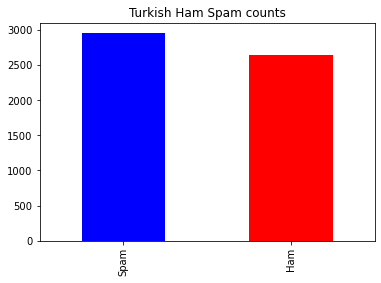

In [9]:
dataset.label.value_counts().plot(kind = 'bar', color = ['blue','red'])
plt.title('Turkish Ham Spam counts')
plt.show()

In [13]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize 

data = []

for i in range(dataset.shape[0]):
    sms = dataset.iloc[i, 1]
    
    # remove non alphabetic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)
    
    # make words lowercase
    sms = sms.lower()
    
    #split message data into words 
    tokenized_sms = word_tokenize(sms) 
    
    # remove stop words
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('Turkish')):
            sms_processed.append(word)
    
    
    sms_text = " ".join(sms_processed)
    data.append(sms_text)

data

[nltk_data] Downloading package stopwords to C:\Users\Fehmi
[nltk_data]     Çakmak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['mudo outletlere once gelen kazaniyor mobilya basta olmak uzere',
 'yeni turkcell avantaj paketleriyle yurtdisinda rahat rahat konusabilirsiniz ihtiyaciniza gore sadece tlye gunluk dk yada tlye ay boyunca dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin',
 'cadde zerinde yeni site c blok no zilde gokcer ozan tuna yaziyo',
 'gnctrkcllli bonnyfood dan lezzetli cicekler firsati tum urunlerde gecerli tllik hediye ceki tl bonny yaz e gonder sms ucreti krs gncteklif com',
 'nerdesin la',
 'sizi arayan turkcell numaralarinin kime ait oldugunu sadece kurusa ogrenmek icin numarayi yazip ye gonderin ornek xxxxxxxxx',
 'tlyukle com dan asistans otel konaklam firsati plus uyelik ilgili ayrintili bilgi icin ozel musteri temsilciniz ismail ozefe sizi arayacaktir',
 'hey barmen ictiyse aynisindan istiyorum',
 'nisana kadar altin yazip a gonderin altin bonusa basvurun',
 'sey cocuklarimizin gelecegi icin hafta subemizde duzenlenen kumbara fonu gunlerine sizi 

In [11]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer

matrix = CountVectorizer(max_features=50)
X = matrix.fit_transform(data).toarray()
y = dataset['label'].map( {'Spam': 1, 'Ham': 0})

In [12]:
# split train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
# K-Neighbors Classifier
kneighbors = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
kneighbors.fit(X_train, y_train)

print("Training Accuracy:", kneighbors.score(X_train, y_train))

predict_knn = kneighbors.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_knn))
print('Precision score: ', precision_score(y_test, predict_knn, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_knn, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_knn, average='weighted'))

Training Accuracy: 0.9732142857142857

Testing Accuracy: 0.9536128456735058
Precision score:  0.9575155578020795
Recall score:     0.9536128456735058
F1 score:         0.953666406251443


In [14]:
#cross validation for KNN
fbeta_scorer = make_scorer(fbeta_score, beta = 0.5)

def validation_score(model_name):
    scores = cross_val_score(model_name, X_train, y_train, cv=10, scoring=fbeta_scorer) 
    return scores

kneighbors_val_score = validation_score(kneighbors)
print(kneighbors_val_score, "\n")
print("Average cross-validation F-beta score:", kneighbors_val_score.mean())

[0.9692029  0.97318339 0.97426471 0.97864769 0.97886029 0.97960993
 0.98012647 0.98206278 0.9839715  0.96803653] 

Average cross-validation F-beta score: 0.9767966188243304


In [15]:
# Random Forest
randFor = RandomForestClassifier()
randFor.fit(X_train, y_train)

print("Training Accuracy:", randFor.score(X_train, y_train))

predict_rf = randFor.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_rf))
print('Precision score: ', precision_score(y_test, predict_rf, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_rf, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_rf, average='weighted'))

Training Accuracy: 0.9854910714285714

Testing Accuracy: 0.975914362176628
Precision score:  0.9761315355667808
Recall score:     0.975914362176628
F1 score:         0.9759287518032003


In [16]:
#cross validation for Random Forest
randFor_val_score = validation_score(randFor)
print(randFor_val_score, "\n")
print("Average cross-validation F-beta score:", randFor_val_score.mean())

[0.97508591 0.97881356 0.98432056 0.98797251 0.98684211 0.97881356
 0.97779675 0.9735269  0.99060632 0.97402597] 

Average cross-validation F-beta score: 0.9807804149049344


In [17]:
# Logistic Regression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

print("Training Accuracy:", logReg.score(X_train, y_train))

predict_lg = logReg.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_lg))
print('Precision score: ', precision_score(y_test, predict_lg, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_lg, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_lg, average='weighted'))

Training Accuracy: 0.9736607142857143

Testing Accuracy: 0.9661016949152542
Precision score:  0.9673847501021717
Recall score:     0.9661016949152542
F1 score:         0.9661402955816292


In [18]:
#cross validation for Logistic Regression
logReg_val_score = validation_score(logReg)
print(logReg_val_score, "\n")
print("Average cross-validation F-beta score:", logReg_val_score.mean())

[0.96788194 0.9760274  0.98498233 0.97750865 0.98524306 0.98615917
 0.98425197 0.98792062 0.98425197 0.97356828] 

Average cross-validation F-beta score: 0.9807795389656349


In [19]:
#fitting a Multinomial Naive Bayes Classifier Model 
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

print("Training Accuracy:", naive_bayes.score(X_train, y_train))

predict_nb = naive_bayes.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_nb))
print('Precision score: ', precision_score(y_test, predict_nb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_nb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_nb, average='weighted'))

Training Accuracy: 0.6479910714285714

Testing Accuracy: 0.6440677966101694
Precision score:  0.7630705598939224
Recall score:     0.6440677966101694
F1 score:         0.5830085618574609


In [20]:
#cross validation for Naive Bayes
naive_bayes_val_score = validation_score(naive_bayes)
print(naive_bayes_val_score, "\n")
print("Average cross-validation F-beta score:", naive_bayes_val_score.mean())

[0.65033784 0.64293598 0.64752252 0.63747228 0.65423163 0.65863229
 0.66744051 0.64095292 0.65499718 0.65242165] 

Average cross-validation F-beta score: 0.6506944800396932


In [21]:
#Support Vector Machine with linear kernel
svc = SVC(kernel = 'linear', C = 1.0)
svc.fit(X_train, y_train)

print("Training Accuracy:", svc.score(X_train, y_train))

predict_svm = svc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_svm))
print('Precision score: ', precision_score(y_test, predict_svm, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_svm, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_svm, average='weighted'))

Training Accuracy: 0.9756696428571429

Testing Accuracy: 0.9696699375557538
Precision score:  0.9697965251245219
Recall score:     0.9696699375557538
F1 score:         0.9696837019177451


In [22]:
#cross validation for Support Vector Machine
svc_val_score = validation_score(svc)
print(svc_val_score, "\n")
print("Average cross-validation F-beta score:", svc_val_score.mean())

[0.96416382 0.95833333 0.97938144 0.97643098 0.98458904 0.97222222
 0.97497843 0.98206661 0.98206661 0.97066437] 

Average cross-validation F-beta score: 0.97448968538909


In [23]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

print("Training Accuracy:", dtc.score(X_train, y_train))

predict_dtc = dtc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_dtc))
print('Precision score: ', precision_score(y_test, predict_dtc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_dtc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_dtc, average='weighted'))

Training Accuracy: 0.9453125

Testing Accuracy: 0.9295272078501338
Precision score:  0.9344792026943306
Recall score:     0.9295272078501338
F1 score:         0.9295975596304892


In [24]:
#cross validation for Decision Tree
dtc_val_score = validation_score(dtc)
print(dtc_val_score, "\n")
print("Average cross-validation F-beta score:", dtc_val_score.mean())

[0.95430108 0.95614035 0.96966912 0.96467391 0.97021661 0.9527972
 0.96803653 0.96136155 0.969163   0.9543379 ] 

Average cross-validation F-beta score: 0.9620697236488581


In [25]:
#Ada Boost Classifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
abc.fit(X_train, y_train)

print("Training Accuracy:", abc.score(X_train, y_train))

predict_abc = abc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_abc))
print('Precision score: ', precision_score(y_test, predict_abc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_abc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_abc, average='weighted'))

Training Accuracy: 0.9738839285714286

Testing Accuracy: 0.975914362176628
Precision score:  0.9763013741421213
Recall score:     0.975914362176628
F1 score:         0.97593282236154


In [26]:
#cross validation for Ada Boost Classifier
abc_val_score = validation_score(abc)
print(abc_val_score, "\n")
print("Average cross-validation F-beta score:", abc_val_score.mean())

[0.97560976 0.97033898 0.97614841 0.9760274  0.98339161 0.98776224
 0.97162511 0.98452279 0.97929249 0.9833187 ] 

Average cross-validation F-beta score: 0.9788037479979191


In [27]:
# XGBoost Classifier
xgb = XGBClassifier(n_estimators=50,random_state=2, use_label_encoder=False, eval_metric='rmse')
xgb.fit(X_train, y_train)

print("Training Accuracy:", xgb.score(X_train, y_train))

predict_xgb = xgb.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_xgb))
print('Precision score: ', precision_score(y_test, predict_xgb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_xgb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_xgb, average='weighted'))

Training Accuracy: 0.9794642857142857

Testing Accuracy: 0.9705619982158786
Precision score:  0.9709552832830292
Recall score:     0.9705619982158786
F1 score:         0.9705845606641043


In [28]:
#cross validation for XGBoost Classifier
xgb_val_score = validation_score(xgb)
print(xgb_val_score, "\n")
print("Average cross-validation F-beta score:", xgb_val_score.mean())

[0.97269625 0.97128378 0.98432056 0.98549488 0.98458904 0.98214286
 0.98022356 0.98701299 0.98723404 0.9663503 ] 

Average cross-validation F-beta score: 0.9801348257103575


In [29]:
# Stochastic Gradient Descent Classifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

print("Training Accuracy:", sgd.score(X_train, y_train))

predict_sgd = sgd.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_sgd))
print('Precision score: ', precision_score(y_test, predict_sgd, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_sgd, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_sgd, average='weighted'))

Training Accuracy: 0.9745535714285715

Testing Accuracy: 0.9705619982158786
Precision score:  0.9706181635202459
Recall score:     0.9705619982158786
F1 score:         0.9705707037508483


In [30]:
#cross validation for Stochastic Gradient Descent
sgd_val_score = validation_score(sgd)
print(sgd_val_score, "\n")
print("Average cross-validation F-beta score:", sgd_val_score.mean())

[0.96416382 0.9625     0.97938144 0.97408027 0.98615917 0.97128378
 0.97497843 0.98543273 0.9787234  0.97257926] 

Average cross-validation F-beta score: 0.9749282317225539


In [32]:
#Initialising ANN
ann = Sequential()
 #Adding First Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs = 50)

Epoch 1/50
140/140 [==============================] - 1s 2ms/step - loss: 0.4845 - accuracy: 0.8750 - val_loss: 0.3849 - val_accuracy: 0.9242
Epoch 2/50
140/140 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.9458 - val_loss: 0.3025 - val_accuracy: 0.9581
Epoch 3/50
140/140 [==============================] - 0s 1ms/step - loss: 0.2697 - accuracy: 0.9647 - val_loss: 0.2387 - val_accuracy: 0.9661
Epoch 4/50
140/140 [==============================] - 0s 1ms/step - loss: 0.2072 - accuracy: 0.9719 - val_loss: 0.1863 - val_accuracy: 0.9706
Epoch 5/50
140/140 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.9723 - val_loss: 0.1446 - val_accuracy: 0.9706
Epoch 6/50
140/140 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9739 - val_loss: 0.1172 - val_accuracy: 0.9688
Epoch 7/50
140/140 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9743 - val_loss: 0.1055 - val_accuracy: 0.9688
Epoch 

In [33]:
loss, accuracy = ann.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = ann.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9808
Training Loss: 0.0655
Testing Accuracy:  0.9741
Testing Loss:  0.0878


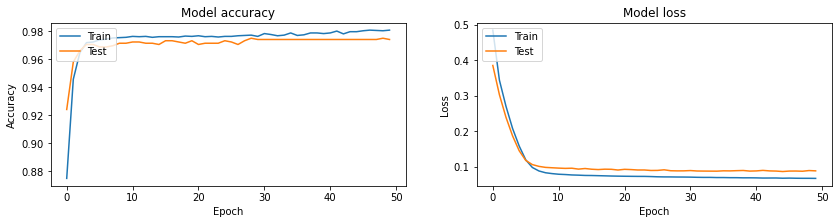

In [34]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [37]:
# create the CNN model
cnn = Sequential()
cnn.add(Embedding(1000, 64, input_length=50))
cnn.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 64)            64000     
                                                                 
 conv1d_3 (Conv1D)           (None, 50, 128)           32896     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 25, 128)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 25, 64)            32832     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 12, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 12, 32)           

In [38]:
# Fit the model
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
112/112 [==============================] - 2s 11ms/step - loss: 0.2167 - accuracy: 0.9076 - val_loss: 0.1498 - val_accuracy: 0.9498
Epoch 2/50
112/112 [==============================] - 1s 10ms/step - loss: 0.1000 - accuracy: 0.9674 - val_loss: 0.1115 - val_accuracy: 0.9654
Epoch 3/50
112/112 [==============================] - 1s 10ms/step - loss: 0.0913 - accuracy: 0.9690 - val_loss: 0.1080 - val_accuracy: 0.9699
Epoch 4/50
112/112 [==============================] - 1s 10ms/step - loss: 0.0805 - accuracy: 0.9771 - val_loss: 0.0944 - val_accuracy: 0.9710
Epoch 5/50
112/112 [==============================] - 1s 11ms/step - loss: 0.0762 - accuracy: 0.9774 - val_loss: 0.0922 - val_accuracy: 0.9743
Epoch 6/50
112/112 [==============================] - 1s 10ms/step - loss: 0.0737 - accuracy: 0.9763 - val_loss: 0.1021 - val_accuracy: 0.9632
Epoch 7/50
112/112 [==============================] - 1s 10ms/step - loss: 0.0762 - accuracy: 0.9766 - val_loss: 0.1147 - val_accuracy: 0.9565

In [39]:
loss, accuracy = cnn.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = cnn.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9828
Training Loss: 0.0621
Testing Accuracy:  0.9715
Testing Loss:  0.1219


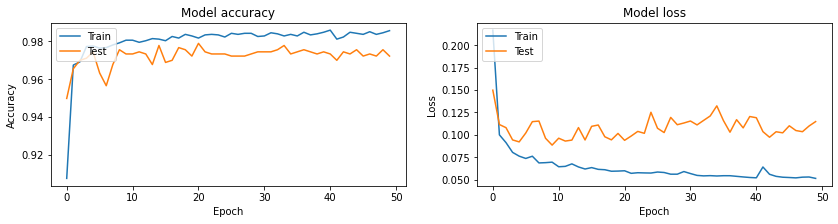

In [40]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [41]:
# Create the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=64, input_length=50))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 64)            64000     
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 130,101
Trainable params: 130,101
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
112/112 [==============================] - 4s 25ms/step - loss: 0.3574 - accuracy: 0.8404 - val_loss: 0.1812 - val_accuracy: 0.9330
Epoch 2/50
112/112 [==============================] - 2s 22ms/step - loss: 0.1576 - accuracy: 0.9495 - val_loss: 0.1474 - val_accuracy: 0.9420
Epoch 3/50
112/112 [==============================] - 2s 22ms/step - loss: 0.1330 - accuracy: 0.9531 - val_loss: 0.1426 - val_accuracy: 0.9542
Epoch 4/50
112/112 [==============================] - 3s 23ms/step - loss: 0.1283 - accuracy: 0.9573 - val_loss: 0.1417 - val_accuracy: 0.9487
Epoch 5/50
112/112 [==============================] - 2s 21ms/step - loss: 0.1269 - accuracy: 0.9593 - val_loss: 0.1495 - val_accuracy: 0.9475
Epoch 6/50
112/112 [==============================] - 2s 21ms/step - loss: 0.1154 - accuracy: 0.9607 - val_loss: 0.1652 - val_accuracy: 0.9531
Epoch 7/50
112/112 [==============================] - 2s 21ms/step - loss: 0.1159 - accuracy: 0.9623 - val_loss: 0.1264 - val_accuracy: 0.9576

In [43]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9732
Training Loss: 0.0833
Testing Accuracy:  0.9634
Testing Loss:  0.1168


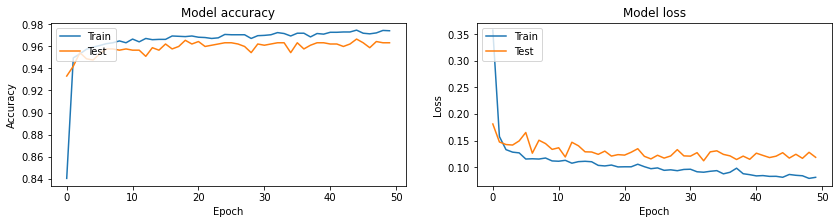

In [44]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()